# Week 7: Deep Learning Essentials

This notebook focuses on the structure of neural networks, how to build and compile one, and how to add different layers and features to the NN. Throught the notebook we will focus again on the task of predicting house prices from house features in the Boston area.

## Steps of Backpropagation 

1. Forward pass: makes prediction from the input to the output layer
2. Error Measurement: using a loss function it compares the desired output and the actual output of the network and returns some measure of error
3. Reverse pass: going backward computes how much each connection contributed to the error, until reaching the input layer
4. Gradient Descent step: tweaks the connection weights to reduce the error

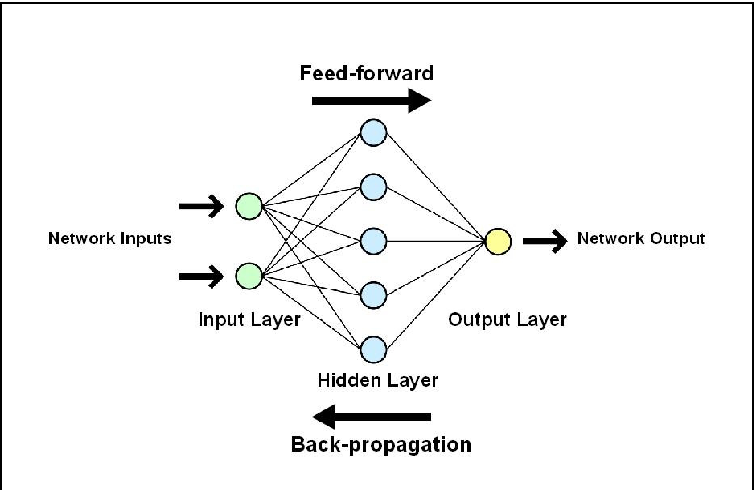

## Building a Network

- 1 input layer + 1 or more hidden layers + 1 output layer
- \# input neurons = \# features 
- \# hidden layers = typically from 1 to 5 
- \# neurons per layer = typycally from 10 to 100
- hidden activation: ReLU
- \# output layers, output activation, loss function: depends on the problem 

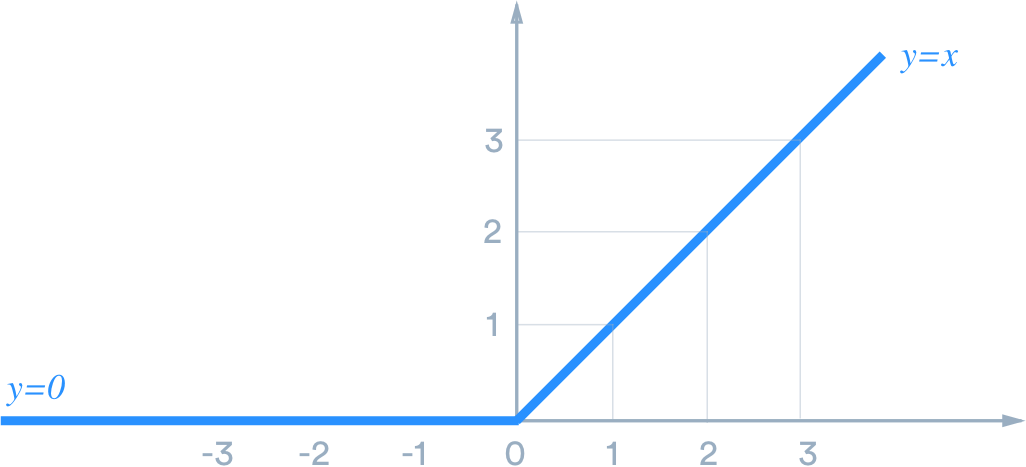

## Continuous Outcomes

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston
boston = load_boston()

bdata = pd.DataFrame(boston.data, columns=boston['feature_names'])
X, y = bdata.iloc[:,:],boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- \# output neurons: 1
- output activation function: none
- loss function: MSE or Mean Absolute Error

In [2]:
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation="relu"))
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_squared_error"])

In [4]:
history = model.fit(X_train, y_train, epochs=8,
                    validation_split=0.2)

Epoch 1/8
11/11 [==============================] - 1s 14ms/step - loss: 129.5736 - mean_squared_error: 129.5736 - val_loss: 75.8461 - val_mean_squared_error: 75.8461
Epoch 2/8
11/11 [==============================] - 0s 4ms/step - loss: 82.6721 - mean_squared_error: 82.6721 - val_loss: 74.4309 - val_mean_squared_error: 74.4309
Epoch 3/8
11/11 [==============================] - 0s 4ms/step - loss: 70.5912 - mean_squared_error: 70.5912 - val_loss: 60.7046 - val_mean_squared_error: 60.7046
Epoch 4/8
11/11 [==============================] - 0s 4ms/step - loss: 67.3973 - mean_squared_error: 67.3973 - val_loss: 60.3685 - val_mean_squared_error: 60.3685
Epoch 5/8
11/11 [==============================] - 0s 4ms/step - loss: 63.0609 - mean_squared_error: 63.0609 - val_loss: 56.2834 - val_mean_squared_error: 56.2834
Epoch 6/8
11/11 [==============================] - 0s 4ms/step - loss: 63.2704 - mean_squared_error: 63.2704 - val_loss: 61.5621 - val_mean_squared_error: 61.5621
Epoch 7/8
11/11 [==

In [5]:
history.history['val_mean_squared_error'][-1]

51.190277099609375

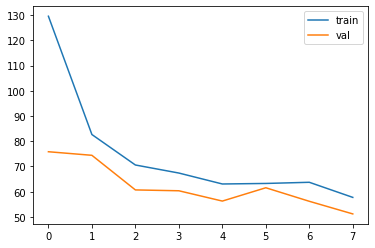

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot performance by epoch
plt.plot(history.epoch,history.history['mean_squared_error'])
plt.plot(history.epoch,history.history['val_mean_squared_error'])
plt.legend(['train', 'val'], loc='best')

In [7]:
for lay in model.layers:
    print(lay.name)
    print(lay.get_weights())

dense
[array([[ 0.10692176,  0.26419407, -0.321685  ,  0.23207581,  0.07879863,
        -0.36973137, -0.29600415, -0.2191524 , -0.22112548,  0.02339304,
         0.29260167,  0.1630955 ,  0.0443698 ,  0.11007366, -0.29928058,
         0.20139748, -0.00488408,  0.40479377,  0.18960197, -0.273622  ,
        -0.22265473,  0.2528155 ,  0.23243624, -0.2088615 , -0.09030196,
         0.03679163,  0.2372911 ,  0.11537581,  0.01541688,  0.35968173],
       [-0.27407792,  0.12316462, -0.18705942, -0.19273822, -0.05784254,
        -0.20163009, -0.06643689, -0.14985849, -0.29088137, -0.25074676,
         0.15340863, -0.18078132,  0.24343255, -0.16799252,  0.05129576,
         0.3291313 , -0.27737528,  0.10952628,  0.2199822 , -0.00785719,
        -0.24831507, -0.01229271,  0.0734888 , -0.3149412 ,  0.10205358,
        -0.20685448,  0.13376915,  0.10945972, -0.27270874, -0.39172587],
       [ 0.04583147,  0.08731266, -0.02550352, -0.15893942, -0.28031275,
        -0.03320999,  0.0339794 , -0.00240

In [8]:
!pip install pydot

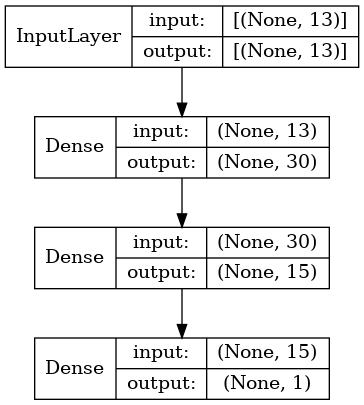

In [9]:

from IPython.display import SVG
from tensorflow.keras.utils import plot_model
plot_model(model,
                   show_shapes=True,
                   show_layer_names=False)

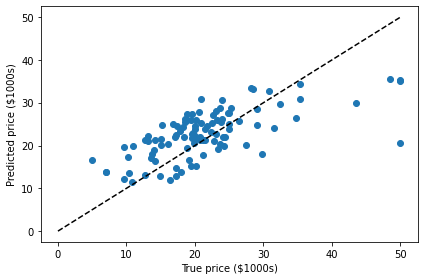

In [10]:
import numpy as np
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

## Binary Classification

In [11]:
beer_data = pd.read_csv("https://www.dropbox.com/s/5fbmj4gqktrmn00/beers.csv?dl=1")
X, y = beer_data.iloc[:, :-1], beer_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- \# output neurons: 1
- output activation function: Logistic
- loss function: binary_crossentropy

Reference to understand loss functions for binary prediction [here](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) 

In [12]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(50, input_dim = X.shape[1], activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                250       
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,551
Trainable params: 1,551
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=8,
                    validation_split=0.2)

Epoch 1/8
5/5 [==============================] - 1s 31ms/step - loss: 1.1679 - accuracy: 0.4722 - val_loss: 1.0151 - val_accuracy: 0.5000
Epoch 2/8
5/5 [==============================] - 0s 6ms/step - loss: 0.9667 - accuracy: 0.4722 - val_loss: 0.8627 - val_accuracy: 0.5000
Epoch 3/8
5/5 [==============================] - 0s 6ms/step - loss: 0.8255 - accuracy: 0.4722 - val_loss: 0.7600 - val_accuracy: 0.5000
Epoch 4/8
5/5 [==============================] - 0s 6ms/step - loss: 0.7324 - accuracy: 0.4792 - val_loss: 0.7045 - val_accuracy: 0.5278
Epoch 5/8
5/5 [==============================] - 0s 6ms/step - loss: 0.6738 - accuracy: 0.5903 - val_loss: 0.6763 - val_accuracy: 0.5000
Epoch 6/8
5/5 [==============================] - 0s 6ms/step - loss: 0.6461 - accuracy: 0.6250 - val_loss: 0.6649 - val_accuracy: 0.6667
Epoch 7/8
5/5 [==============================] - 0s 6ms/step - loss: 0.6297 - accuracy: 0.6667 - val_loss: 0.6610 - val_accuracy: 0.7222
Epoch 8/8
5/5 [=========================

0.6944444179534912


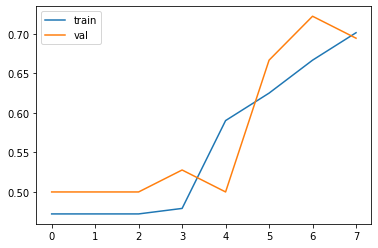

In [15]:
print(history.history['val_accuracy'][-1])
plt.plot(history.epoch,history.history['accuracy'])
plt.plot(history.epoch,history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')

In [16]:
y_pred_prob = model.predict(X_test)
y_pred = np.around(y_pred_prob) 

y_pred_prob[0:7], y_pred[0:7], y_test[0:7]

(array([[0.6794552 ],
        [0.6494791 ],
        [0.58944947],
        [0.58717614],
        [0.5975089 ],
        [0.76077944],
        [0.4325379 ]], dtype=float32),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.]], dtype=float32),
 9      1
 184    0
 120    1
 207    1
 148    1
 214    1
 182    1
 Name: is_yummy, dtype: int64)

## Multiclass Classification

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

- \# output neurons: \# classes
- output activation function: softmax
- loss function: sparse_categorical_crossentropy

In [18]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(100, input_dim=X_train.shape[1], activation="relu"))
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(60, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               500       
                                                                 
 dense_7 (Dense)             (None, 75)                7575      
                                                                 
 dense_8 (Dense)             (None, 60)                4560      
                                                                 
 dense_9 (Dense)             (None, 3)                 183       
                                                                 
Total params: 12,818
Trainable params: 12,818
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=8,
                    validation_split=0.2)

Epoch 1/8
3/3 [==============================] - 0s 101ms/step - loss: 1.0454 - accuracy: 0.3646 - val_loss: 0.9794 - val_accuracy: 0.4167
Epoch 2/8
3/3 [==============================] - 0s 20ms/step - loss: 0.9116 - accuracy: 0.6667 - val_loss: 0.8115 - val_accuracy: 0.7083
Epoch 3/8
3/3 [==============================] - 0s 17ms/step - loss: 0.8170 - accuracy: 0.6458 - val_loss: 0.7321 - val_accuracy: 0.7083
Epoch 4/8
3/3 [==============================] - 0s 15ms/step - loss: 0.7332 - accuracy: 0.6667 - val_loss: 0.6962 - val_accuracy: 0.9583
Epoch 5/8
3/3 [==============================] - 0s 14ms/step - loss: 0.6571 - accuracy: 0.9167 - val_loss: 0.6472 - val_accuracy: 1.0000
Epoch 6/8
3/3 [==============================] - 0s 12ms/step - loss: 0.5937 - accuracy: 0.9375 - val_loss: 0.5955 - val_accuracy: 1.0000
Epoch 7/8
3/3 [==============================] - 0s 13ms/step - loss: 0.5388 - accuracy: 0.9583 - val_loss: 0.5516 - val_accuracy: 0.9583
Epoch 8/8
3/3 [==================

0.9583333134651184


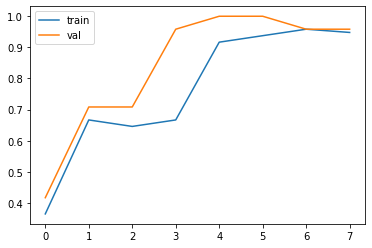

In [21]:
print(history.history['val_accuracy'][-1])
plt.plot(history.epoch,history.history['accuracy'])
plt.plot(history.epoch,history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')

In [22]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob,axis=1)

y_pred_prob[0:7], y_pred[0:7], y_test[0:7]

(array([[0.06793705, 0.54783773, 0.3842252 ],
        [0.8687572 , 0.10577009, 0.02547277],
        [0.00590858, 0.33177784, 0.6623136 ],
        [0.07296394, 0.541541  , 0.38549507],
        [0.05736148, 0.56894547, 0.3736931 ],
        [0.8342625 , 0.13127503, 0.03446244],
        [0.17063881, 0.550838  , 0.27852318]], dtype=float32),
 array([1, 0, 2, 1, 1, 0, 1]),
 array([1, 0, 2, 1, 1, 0, 1]))

## Improve NN Performance

During backpropagation the algorithm computes the gradient of the cost function w.r.t each parameter and it uses these gradients to update each parameter with a Gradient Descent step. <br>

<b>Vanishing gradient problem:</b> gradients often get smaller and smaller as the algorithm progresses down to the lower layers $\implies$ lower layers connection weights remain virtually unchanged. <br>

<b>Exploding gradient problem:</b> gradients grow bigger and bigger until layers get insanely large weight updates and the algorithm diverges.

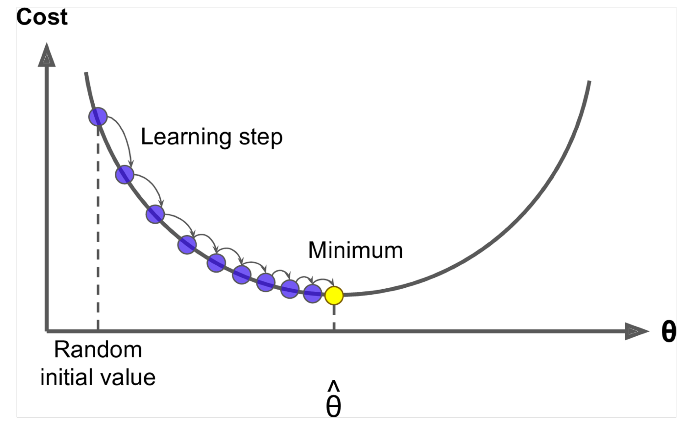

### Initializers

**Problems:**

- Initial weights too large $\implies$ Exploding Gradient
- Initial weights too small $\implies$ Vanishing Gradient
- Correlated (collinear) initial weights $\implies$ Backpropagation cannot distinguish their contribution to the output error

**Solution:** Initialization of neuron weights should be random *but* you can choose the distribution (standard practice is to use "Glorot" and "HeNormal", which alleviate the problem of unstable gradients).

In [23]:
X, y = bdata.iloc[:,:],boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from tensorflow.keras import initializers

model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation="relu",
    kernel_initializer=initializers.he_normal()))
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                420       
                                                                 
 dense_11 (Dense)            (None, 15)                465       
                                                                 
 dense_12 (Dense)            (None, 1)                 16        
                                                                 
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


### Batch Normalization and Early Stopping

**Problem:** Distribution of weights is likely to change at every step of backpropagation $\implies$ slower and less efficient model.

**Solution:** aftereach layer normalize the inputs to have mean zero and variance 1. It helps to increase performance, speed up training, and regularize the model.

In [24]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation="relu",
    kernel_initializer=initializers.he_normal()))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 30)                420       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dense_14 (Dense)            (None, 15)                465       
                                                                 
 batch_normalization_1 (Batc  (None, 15)               60        
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1,081
Trainable params: 991
Non-trainabl

In [25]:
model.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_squared_error"])

In [26]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model.fit(X_train, y_train, epochs=8,
                    validation_split=0.2, callbacks=[es])

Epoch 1/8
11/11 [==============================] - 1s 17ms/step - loss: 578.8079 - mean_squared_error: 578.8079 - val_loss: 559.7991 - val_mean_squared_error: 559.7991
Epoch 2/8
11/11 [==============================] - 0s 3ms/step - loss: 562.2055 - mean_squared_error: 562.2055 - val_loss: 559.7991 - val_mean_squared_error: 559.7991
Epoch 00002: early stopping


### Alternative Activation Functions

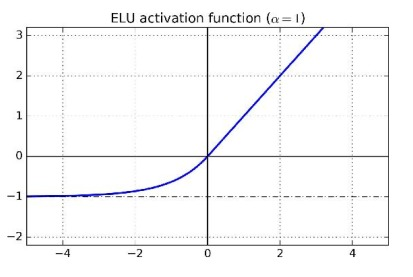 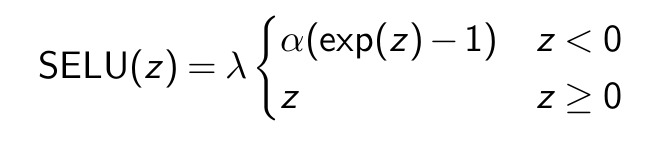

Exponential Linear Unit (ELU) and Scaled ELU (SELU). In particular, SELU enhances the performance of the network, that is a neural network with only dense layers, each using SELU as activation function, the network will self-normalize, provided that:
- inputs are standardized
- it uses LeCun normal initialization for weights
- set $\lambda \approx 1.0507$ and $\alpha \approx 1.6732$
- in general SELU > ELU > ReLU

Note that with SELU batch normalization is not needed as the newtwork self-normalizes

### Optimizer 

Existing research showed that it has a big impact on the performance of the model. <i>Adam</i> (adaptive moment estimation) is faster and almost as good as <i>sgd</i>. 

In [27]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_squared_error"])

es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model.fit(X_train, y_train, epochs=8,
                    validation_split=0.2, callbacks=[es])

Epoch 1/8
11/11 [==============================] - 1s 15ms/step - loss: 264.6108 - mean_squared_error: 264.6108 - val_loss: 325.0240 - val_mean_squared_error: 325.0240
Epoch 2/8
11/11 [==============================] - 0s 3ms/step - loss: 86.7357 - mean_squared_error: 86.7357 - val_loss: 688.5322 - val_mean_squared_error: 688.5322
Epoch 00002: early stopping


### Regularization and Dropout

Neural network parameters, like regressions, can be regularized with L1 and/or L2 penalties to push weak neurons to zero and create a sparse model $\rightarrow$ avoid overfitting.

In [28]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation="relu",
    kernel_initializer=initializers.he_normal(), kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 30)                420       
                                                                 
 batch_normalization_2 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 15)                465       
                                                                 
 batch_normalization_3 (Batc  (None, 15)               60        
 hNormalization)                                                 
                                                                 
 dense_18 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1,081
Trainable params: 991
Non-trainabl

Alternatively, use <i>dropout</i> during training (it is NOT used during validation), with probability ($p$) between 10% and 50%. Alternative dropout regularizations are:
- Normal dropout: neurons don't get dropped but coefficients are down-weighted by $p$
- Monte Carlo dropout: continues to allow dropout but produce 100 predictions, and averages them

In [29]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation="relu",
    kernel_initializer=initializers.he_normal()))
model.add(keras.layers.BatchNormalization())
keras.layers.Dropout(0.3)
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.BatchNormalization())
keras.layers.Dropout(0.3)
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 30)                420       
                                                                 
 batch_normalization_4 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_20 (Dense)            (None, 15)                465       
                                                                 
 batch_normalization_5 (Batc  (None, 15)               60        
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1,081
Trainable params: 991
Non-trainabl

## Tuning NN Hyperparameters

It is an active area of research. One option is to try combinations of hyperparameters and see which one works best on the validation set, using GridSearchCV or RandomizedSearchCV

In [30]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_dim=X_train.shape[1]):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(n_neurons, input_dim=input_dim, activation="relu"))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mean_squared_error"])
    return model

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2)

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train, y_train, epochs=16,
               validation_data=(X_val, y_val),
              callbacks=[es])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_test)

Epoch 1/16


<ipython-input-30-92bf974d17a1>:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


11/11 [==============================] - 1s 22ms/step - loss: 462.2929 - mean_squared_error: 462.2929 - val_loss: 154.8638 - val_mean_squared_error: 154.8638
Epoch 2/16
11/11 [==============================] - 0s 5ms/step - loss: 149.8943 - mean_squared_error: 149.8943 - val_loss: 77.3718 - val_mean_squared_error: 77.3718
Epoch 00002: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 95.8853 - mean_squared_error: 95.8853


In [31]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_val, y_val),
                  callbacks=[es])


Epoch 1/100
7/7 [==============================] - 1s 22ms/step - loss: 166.3020 - mean_squared_error: 166.3020 - val_loss: 53.6355 - val_mean_squared_error: 53.6355
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 98.9012 - mean_squared_error: 98.9012 - val_loss: 59.3514 - val_mean_squared_error: 59.3514
Epoch 00002: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 84.7051 - mean_squared_error: 84.7051
Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 2219.0532 - mean_squared_error: 2219.0532 - val_loss: 246.0829 - val_mean_squared_error: 246.0829
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 193.1046 - mean_squared_error: 193.1046 - val_loss: 208.5948 - val_mean_squared_error: 208.5948
Epoch 00002: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 209.8062 - mean_squared_error: 209.8062
Epoch 1/100
7/7 [==============================] - 0s 22ms/step - loss: 187.7264 -

Epoch 00002: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 87.1144 - mean_squared_error: 87.1144
Epoch 1/100
7/7 [==============================] - 0s 17ms/step - loss: 7682.4453 - mean_squared_error: 7682.4453 - val_loss: 684.6998 - val_mean_squared_error: 684.6998
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 361.0356 - mean_squared_error: 361.0356 - val_loss: 169.7834 - val_mean_squared_error: 169.7834
Epoch 00002: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 193.6284 - mean_squared_error: 193.6284
Epoch 1/100
7/7 [==============================] - 0s 16ms/step - loss: 777.2363 - mean_squared_error: 777.2363 - val_loss: 352.0995 - val_mean_squared_error: 352.0995
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 328.8544 - mean_squared_error: 328.8544 - val_loss: 99.7858 - val_mean_squared_error: 99.7858
Epoch 00002: early stopping
4/4 [==============================] - 0s 1ms/step

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fe448b92c40>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe448e4baf0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [32]:
print('Best Parameters: ')
print(rnd_search_cv.best_params_)
print('Best Score: ', rnd_search_cv.best_score_)

Best Parameters: 
{'learning_rate': 0.008281642763738908, 'n_hidden': 3, 'n_neurons': 91}
Best Score:  -107.8232421875


However, this approach is quite time consuming, thus, allows you to test only a few combinations of hyperparameters. Some suggestions:
- It is better to have too many layers, and use regularization
- Try between 1 and 5 layers
- Adding layers usually helps more than adding neurons
- Using ReLU in hidden layers is a good baseline